<a href="https://colab.research.google.com/github/fivetop/romee/blob/main/WINE_QUALITY_Project_2_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### wine quality 예측 문제
##### https://archive.ics.uci.edu/ml/datasets/wine+quality

In [ ]:
import pandas as pd

In [ ]:
# 데이터 로드 및 정리
# 다운로드 받은 원본 파일은 분리자가 세미콜론

red_df = pd.read_csv('./winequality-red.csv', sep=';')
white_df = pd.read_csv('./winequality-white.csv', sep=';')

In [ ]:
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
# 분리자를 콤마로 해서 사본 만들어 저장
# 일반적으로 csv 파일은 세미콜론이 아닌 콤마로 분리자를 사용하는 것이 일반적이기 때문

red_df.to_csv('./winequality-red2.csv', index=False)
white_df.to_csv('./winequality-white2.csv', index=False)

#### 콤마로 분리된 csv 파일 읽고 작업

In [ ]:
red_df = pd.read_csv('./winequality-red2.csv')
white_df = pd.read_csv('./winequality-white2.csv')

In [ ]:
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


red wine 표준화

In [ ]:
# red wine 표준화 시행 (정답 quality 칼럼은 제외하고 표준화)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

red_scaled_col = red_df.columns.difference(['quality'])

red_scaled_np = scaler.fit_transform(red_df[red_scaled_col])

# scale 리턴값은 numpy 이므로 다시 DataFrame 생성
red_scaled_df = pd.DataFrame(red_scaled_np, columns=red_scaled_col)

red_scaled_df['quality'] = red_df['quality'].values

red_scaled_df.describe()

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity,quality
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1599.000000
mean,9.437243e-16,3.836136e-16,4.335355e-16,-3.482795e-14,3.435512e-16,1.432042e-16,3.002879e-15,-1.905223e-16,7.639596e-16,1.289532e-16,1.699704e-16,5.636023
std,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,0.807569
min,-1.898919e+00,-1.603945e+00,-1.391472e+00,-3.538731e+00,-2.137045e+00,-1.422500e+00,-3.700401e+00,-1.162696e+00,-1.936507e+00,-1.230584e+00,-2.278280e+00,3.000000
25%,-8.663789e-01,-3.712290e-01,-9.293181e-01,-6.077557e-01,-7.007187e-01,-8.487156e-01,-6.551405e-01,-4.532184e-01,-6.382196e-01,-7.440403e-01,-7.699311e-01,5.000000
50%,-2.093081e-01,-1.799455e-01,-5.636026e-02,1.760083e-03,-2.410944e-01,-1.793002e-01,-7.212705e-03,-2.403750e-01,-2.251281e-01,-2.574968e-01,-4.368911e-02,6.000000
75%,6.354971e-01,5.384542e-02,7.652471e-01,5.768249e-01,5.057952e-01,4.901152e-01,5.759223e-01,4.341614e-02,4.240158e-01,4.723184e-01,6.266881e-01,6.000000
max,4.202453e+00,1.112703e+01,3.743574e+00,3.680055e+00,4.355149e+00,5.367284e+00,4.528282e+00,9.195681e+00,7.918677e+00,7.375154e+00,5.877976e+00,8.000000


In [ ]:
# white wine 표준화 시행 (정답 quality 칼럼은 제외하고 표준화)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

white_scaled_col = white_df.columns.difference(['quality'])

white_scaled_np = scaler.fit_transform(white_df[white_scaled_col])

# scale 리턴값은 numpy 이므로 다시 DataFrame 생성
white_scaled_df = pd.DataFrame(white_scaled_np, columns=white_scaled_col)

white_scaled_df['quality'] = white_df['quality'].values

white_scaled_df.describe()

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity,quality
count,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4898.000000
mean,-2.169718e-15,3.410456e-16,6.019639e-16,3.220250e-14,7.584333e-17,-4.671641e-17,-1.203860e-15,-1.024542e-16,-7.572999e-16,1.057636e-16,5.196832e-16,5.877909
std,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,0.885639
min,-2.043297e+00,-1.683274e+00,-2.761743e+00,-2.313038e+00,-3.620351e+00,-1.958677e+00,-3.101408e+00,-1.141944e+00,-2.364709e+00,-3.044230e+00,-1.966985e+00,3.000000
25%,-8.242757e-01,-4.473347e-01,-5.304757e-01,-7.707066e-01,-6.575011e-01,-7.237750e-01,-6.508363e-01,-9.250474e-01,-6.997104e-01,-7.144739e-01,-6.771010e-01,5.000000
50%,-9.286267e-02,-1.269060e-01,-1.172780e-01,-9.609320e-02,-6.493106e-02,-7.692173e-02,-5.475133e-02,-2.349217e-01,-1.739212e-01,-1.026189e-01,-1.809917e-01,6.000000
75%,7.198184e-01,1.935226e-01,4.611988e-01,6.930457e-01,5.276390e-01,6.287364e-01,6.075653e-01,6.918185e-01,5.271310e-01,6.739664e-01,4.143393e-01,6.000000
max,2.995326e+00,1.374308e+01,1.095642e+01,1.503130e+01,8.705106e+00,1.491831e+01,4.184075e+00,1.171411e+01,5.171602e+00,7.098444e+00,8.153643e+00,9.000000


wine 구분을 위해 type 열 추가

In [ ]:
# 구분을 위해 type 열 추가

print('before => ',red_scaled_df.shape, white_scaled_df.shape)

red_scaled_df['type'] = 'red'
white_scaled_df['type'] = 'white'

#red_scaled_df.insert(0, column='type', value='red')
#white_scaled_df.insert(0, column='type', value='white')

print('after => ',red_scaled_df.shape, white_scaled_df.shape)

before =>  (1599, 12) (4898, 12)
after =>  (1599, 13) (4898, 13)


In [ ]:
white_scaled_df.head()

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity,quality,type
0,-1.393152,-0.035355,0.213280,2.331512,0.172097,0.569932,-1.246921,2.821349,-0.349184,0.744565,-0.081770,6,white
1,-0.824276,0.147747,0.048001,-0.009154,-0.657501,-1.253019,0.740029,-0.944765,0.001342,-0.149685,0.215896,6,white
2,-0.336667,0.193523,0.543838,0.358665,1.475751,-0.312141,0.475102,0.100282,-0.436816,-0.973336,0.017452,6,white
3,-0.499203,0.559727,-0.117278,0.525855,0.409125,0.687541,0.011480,0.415768,-0.787342,1.121091,-0.478657,6,white
4,-0.499203,0.559727,-0.117278,0.525855,0.409125,0.687541,0.011480,0.415768,-0.787342,1.121091,-0.478657,6,white


In [ ]:
red_scaled_df.head()

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity,quality,type
0,-0.960246,-0.243707,-1.391472,0.558274,-0.528360,-0.466193,1.288643,-0.453218,-0.579207,-0.379133,0.961877,5,red
1,-0.584777,0.223875,-1.391472,0.028261,-0.298547,0.872638,-0.719933,0.043416,0.128950,0.624363,1.967442,5,red
2,-0.584777,0.096353,-1.186070,0.134264,-0.298547,-0.083669,-0.331177,-0.169427,-0.048089,0.229047,1.297065,5,red
3,-0.584777,-0.264960,1.484154,0.664277,1.654856,0.107592,-0.979104,-0.453218,-0.461180,0.411500,-1.384443,6,red
4,-0.960246,-0.243707,-1.391472,0.558274,-0.528360,-0.466193,1.288643,-0.453218,-0.579207,-0.379133,0.961877,5,red


#### 레드와인과 화이트와인을 비교 분석할 예정이므로 하나의 데이터프레임으로 합친다

In [ ]:
# pd.concat() 이용해서 하나로 합치기

wine_scaled_df = pd.concat([red_scaled_df, white_scaled_df],axis=0)

wine_scaled_df.shape

(6497, 13)

In [ ]:
wine_scaled_df['type']

0         red
1         red
2         red
3         red
4         red
        ...  
4893    white
4894    white
4895    white
4896    white
4897    white
Name: type, Length: 6497, dtype: object

#### 데이터 기본정보 확인
##### info(), describe(), unique(), value_counts(), isnull().sum()

In [ ]:
wine_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   alcohol               6497 non-null   float64
 1   chlorides             6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   density               6497 non-null   float64
 4   fixed acidity         6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   pH                    6497 non-null   float64
 7   residual sugar        6497 non-null   float64
 8   sulphates             6497 non-null   float64
 9   total sulfur dioxide  6497 non-null   float64
 10  volatile acidity      6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [ ]:
wine_scaled_df.describe()

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity,quality
count,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6497.000000
mean,-1.408242e-15,3.533506e-16,5.588026e-16,1.570283e-14,1.271707e-16,1.965148e-18,-1.726425e-16,-1.253593e-16,-3.828108e-16,1.059813e-16,4.311534e-16,5.818378
std,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,0.873255
min,-2.043297e+00,-1.683274e+00,-2.761743e+00,-3.538731e+00,-3.620351e+00,-1.958677e+00,-3.700401e+00,-1.162696e+00,-2.364709e+00,-3.044230e+00,-2.278280e+00,3.000000
25%,-8.663789e-01,-4.473347e-01,-6.131152e-01,-7.381045e-01,-6.575011e-01,-7.237750e-01,-6.551405e-01,-8.165991e-01,-6.972327e-01,-7.144739e-01,-6.771010e-01,5.000000
50%,-1.741308e-01,-1.586918e-01,-1.172780e-01,-7.603035e-02,-6.873526e-02,-1.357266e-01,-5.475133e-02,-2.403750e-01,-1.739212e-01,-1.358610e-01,-1.554186e-01,6.000000
75%,7.198184e-01,1.813678e-01,5.438384e-01,6.596076e-01,5.276390e-01,5.857459e-01,6.075653e-01,4.691029e-01,4.830289e-01,6.504335e-01,5.135612e-01,6.000000
max,4.202453e+00,1.374308e+01,1.095642e+01,1.503130e+01,8.705106e+00,1.491831e+01,4.528282e+00,1.171411e+01,7.918677e+00,7.375154e+00,8.153643e+00,9.000000


In [ ]:
wine_scaled_df.isnull().sum()

alcohol                 0
chlorides               0
citric acid             0
density                 0
fixed acidity           0
free sulfur dioxide     0
pH                      0
residual sugar          0
sulphates               0
total sulfur dioxide    0
volatile acidity        0
quality                 0
type                    0
dtype: int64

In [ ]:
wine_scaled_df['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9], dtype=int64)

In [ ]:
wine_scaled_df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [ ]:
wine_scaled_df['quality'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
4893    False
4894    False
4895    False
4896    False
4897    False
Name: quality, Length: 6497, dtype: bool

딥러닝 학습데이터 생성을 위해 전처리

In [ ]:
# type 항목의 'red' = 0, white = 1 로 변경

wine_scaled_df['type'] = wine_scaled_df['type'].replace('red', 0)

wine_scaled_df['type'] = wine_scaled_df['type'].replace('white', 1)

wine_scaled_df.head()

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity,quality,type
0,-0.960246,-0.243707,-1.391472,0.558274,-0.528360,-0.466193,1.288643,-0.453218,-0.579207,-0.379133,0.961877,5,0
1,-0.584777,0.223875,-1.391472,0.028261,-0.298547,0.872638,-0.719933,0.043416,0.128950,0.624363,1.967442,5,0
2,-0.584777,0.096353,-1.186070,0.134264,-0.298547,-0.083669,-0.331177,-0.169427,-0.048089,0.229047,1.297065,5,0
3,-0.584777,-0.264960,1.484154,0.664277,1.654856,0.107592,-0.979104,-0.453218,-0.461180,0.411500,-1.384443,6,0
4,-0.960246,-0.243707,-1.391472,0.558274,-0.528360,-0.466193,1.288643,-0.453218,-0.579207,-0.379133,0.961877,5,0


딥러닝을 위해서 feature column, label column 분리함

In [ ]:
feature_col = wine_scaled_df.columns.difference(['type','quality'])  # 입력데이터

label_col = wine_scaled_df['type']  # 정답데이터

In [ ]:
wine_feature_df = wine_scaled_df[feature_col]
wine_label_df = label_col

In [ ]:
wine_feature_df.head()

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity
0,-0.960246,-0.243707,-1.391472,0.558274,-0.528360,-0.466193,1.288643,-0.453218,-0.579207,-0.379133,0.961877
1,-0.584777,0.223875,-1.391472,0.028261,-0.298547,0.872638,-0.719933,0.043416,0.128950,0.624363,1.967442
2,-0.584777,0.096353,-1.186070,0.134264,-0.298547,-0.083669,-0.331177,-0.169427,-0.048089,0.229047,1.297065
3,-0.584777,-0.264960,1.484154,0.664277,1.654856,0.107592,-0.979104,-0.453218,-0.461180,0.411500,-1.384443
4,-0.960246,-0.243707,-1.391472,0.558274,-0.528360,-0.466193,1.288643,-0.453218,-0.579207,-0.379133,0.961877


In [ ]:
wine_label_df.head()

0    0
1    0
2    0
3    0
4    0
Name: type, dtype: int64

딥러닝 학습데이터로 사용하기 위해 numpy 변환

In [ ]:
# numpy 변환
import numpy as np

wine_feature_np = wine_feature_df.to_numpy().astype('float32')
wine_label_np = wine_label_df.to_numpy().astype('float32')

print(wine_feature_np.shape, wine_label_np.shape)

(6497, 11) (6497,)


In [ ]:
# shuffle

s = np.arange(len(wine_feature_np))

np.random.shuffle(s)

wine_feature_np = wine_feature_np[s]
wine_label_np = wine_label_np[s]

print(wine_feature_np.shape, wine_label_np.shape)

(6497, 11) (6497,)


train / test data 분리

In [ ]:
# 85% : 15% 비율로 train / test data 분리

split_ratio = 0.15

test_num = int(split_ratio*len(wine_feature_np))

x_test = wine_feature_np[:test_num]
y_test = wine_label_np[:test_num]

x_train = wine_feature_np[test_num:]
y_train = wine_label_np[test_num:]

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(5523, 11) (974, 11) (5523,) (974,)


# Deep Learning Model 구축

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
model = Sequential()

model.add(Dense(128, activation='relu', input_shape=(x_train.shape[1],)))

model.add(Dense(1, activation='sigmoid'))  # type

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               1536      
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,665
Trainable params: 1,665
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy', metrics=['accuracy'] )

In [ ]:
from datetime import datetime

start_time = datetime.now()

hist = model.fit(x_train, y_train, 
                 epochs=200, batch_size=32, 
                 validation_data=(x_test, y_test))

end_time = datetime.now()

print('elapsed time => ', end_time-start_time)

Epoch 1/200
173/173 [==============================] - 1s 2ms/step - loss: 0.5228 - accuracy: 0.7576 - val_loss: 0.5028 - val_accuracy: 0.7454
Epoch 2/200
173/173 [==============================] - 0s 1ms/step - loss: 0.4452 - accuracy: 0.7883 - val_loss: 0.4474 - val_accuracy: 0.7752
Epoch 3/200
173/173 [==============================] - 0s 1ms/step - loss: 0.3987 - accuracy: 0.8180 - val_loss: 0.4076 - val_accuracy: 0.7998
Epoch 4/200
173/173 [==============================] - 0s 1ms/step - loss: 0.3609 - accuracy: 0.8432 - val_loss: 0.3726 - val_accuracy: 0.8224
Epoch 5/200
173/173 [==============================] - 0s 1ms/step - loss: 0.3272 - accuracy: 0.8615 - val_loss: 0.3384 - val_accuracy: 0.8429
Epoch 6/200
173/173 [==============================] - 0s 1ms/step - loss: 0.2973 - accuracy: 0.8765 - val_loss: 0.3099 - val_accuracy: 0.8624
Epoch 7/200
173/173 [==============================] - 0s 1ms/step - loss: 0.2701 - accuracy: 0.8923 - val_loss: 0.2844 - val_accuracy: 0.8830

Epoch 58/200
173/173 [==============================] - 0s 1ms/step - loss: 0.0828 - accuracy: 0.9718 - val_loss: 0.1087 - val_accuracy: 0.9559
Epoch 59/200
173/173 [==============================] - 0s 1ms/step - loss: 0.0816 - accuracy: 0.9727 - val_loss: 0.1079 - val_accuracy: 0.9548
Epoch 60/200
173/173 [==============================] - 0s 1ms/step - loss: 0.0798 - accuracy: 0.9727 - val_loss: 0.1103 - val_accuracy: 0.9641
Epoch 61/200
173/173 [==============================] - 0s 1ms/step - loss: 0.0802 - accuracy: 0.9723 - val_loss: 0.1076 - val_accuracy: 0.9589
Epoch 62/200
173/173 [==============================] - 0s 1ms/step - loss: 0.0797 - accuracy: 0.9721 - val_loss: 0.1066 - val_accuracy: 0.9569
Epoch 63/200
173/173 [==============================] - 0s 1ms/step - loss: 0.0794 - accuracy: 0.9725 - val_loss: 0.1106 - val_accuracy: 0.9569
Epoch 64/200
173/173 [==============================] - 0s 1ms/step - loss: 0.0785 - accuracy: 0.9732 - val_loss: 0.1082 - val_accuracy:

Epoch 115/200
173/173 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9837 - val_loss: 0.0979 - val_accuracy: 0.9661
Epoch 116/200
173/173 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9844 - val_loss: 0.0902 - val_accuracy: 0.9641
Epoch 117/200
173/173 [==============================] - 0s 1ms/step - loss: 0.0502 - accuracy: 0.9846 - val_loss: 0.0899 - val_accuracy: 0.9630
Epoch 118/200
173/173 [==============================] - 0s 1ms/step - loss: 0.0494 - accuracy: 0.9859 - val_loss: 0.0926 - val_accuracy: 0.9579
Epoch 119/200
173/173 [==============================] - 0s 1ms/step - loss: 0.0501 - accuracy: 0.9835 - val_loss: 0.0952 - val_accuracy: 0.9579
Epoch 120/200
173/173 [==============================] - 0s 1ms/step - loss: 0.0490 - accuracy: 0.9855 - val_loss: 0.0966 - val_accuracy: 0.9641
Epoch 121/200
173/173 [==============================] - 0s 1ms/step - loss: 0.0492 - accuracy: 0.9846 - val_loss: 0.0943 - val_ac

173/173 [==============================] - 0s 1ms/step - loss: 0.0318 - accuracy: 0.9908 - val_loss: 0.0916 - val_accuracy: 0.9630
Epoch 172/200
173/173 [==============================] - 0s 1ms/step - loss: 0.0319 - accuracy: 0.9911 - val_loss: 0.0923 - val_accuracy: 0.9651
Epoch 173/200
173/173 [==============================] - 0s 1ms/step - loss: 0.0312 - accuracy: 0.9909 - val_loss: 0.0902 - val_accuracy: 0.9641
Epoch 174/200
173/173 [==============================] - 0s 1ms/step - loss: 0.0310 - accuracy: 0.9919 - val_loss: 0.0967 - val_accuracy: 0.9630
Epoch 175/200
173/173 [==============================] - 0s 1ms/step - loss: 0.0311 - accuracy: 0.9929 - val_loss: 0.0907 - val_accuracy: 0.9610
Epoch 176/200
173/173 [==============================] - 0s 1ms/step - loss: 0.0316 - accuracy: 0.9908 - val_loss: 0.0932 - val_accuracy: 0.9610
Epoch 177/200
173/173 [==============================] - 0s 1ms/step - loss: 0.0307 - accuracy: 0.9911 - val_loss: 0.0983 - val_accuracy: 0.9610

In [ ]:
pred = model.predict(x_test[-5:])

print(pred.flatten())
print(y_test[-5:])

1/1 [==============================] - 0s 39ms/step
[9.999992e-01 1.000000e+00 9.999993e-01 3.422476e-18 9.983702e-01]
[1. 1. 1. 0. 1.]


In [ ]:
model.evaluate(x_test, y_test)

31/31 [==============================] - 0s 928us/step - loss: 0.0909 - accuracy: 0.9641


[0.09085965901613235, 0.9640657305717468]

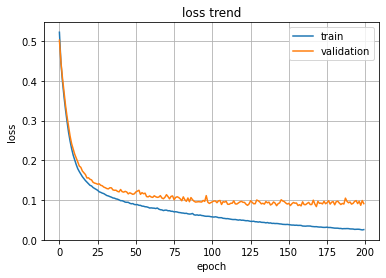

In [ ]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.title('loss trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

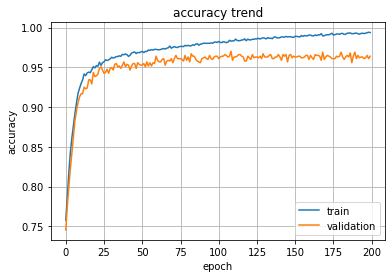

In [ ]:
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='validation')
plt.title('accuracy trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()